In [1]:
%config Completer.use_jedi = False

import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed, dump, load
import time
import pandas as pd
import seaborn as sns
%matplotlib inline
from sklearn.decomposition import NMF
from mne.viz import plot_connectivity_circle
from sklearn.decomposition import PCA


#import torch
from hummingbird.ml import convert, load #https://github.com/microsoft/hummingbird
# hummingbird is usefull when you have trained model and you need to speed up prediction step
# it doesn't have nmf

from utils import load_file
from utils import DataResize
from utils import DeltaF
from utils import NMFCV
from utils import video_player
from utils import blob_labeling, image_threshold
from utils import plot_nmf_ROIs

In [7]:
# reading ROIs wt/scn2a and concatinate them
wt = pd.read_csv('C:/Users/admin/Documents/Python Scripts/P6 Project/Calcium-imaging-data-analysis/results/ROIs/wt_210126_P5_scn2a_minus_run345_ROIsTable.csv')
scn2a = pd.read_csv('C:/Users/admin/Documents/Python Scripts/P6 Project/Calcium-imaging-data-analysis/results/ROIs/scn2a_210127_P6_scn2a_triplet_run456_ROIsTable.csv')

# add type column
wt['group'] = 'WT'
scn2a['group'] = 'SCN2A'

# normalize area from pixel to mm2
# 1mm = 17 pixels --> 1mm2 = 17*17 p2
wt['area_norm'] = wt['area'] / 119
scn2a['area_norm'] = scn2a['area'] / 119

In [8]:
# Cat them
df = wt.append(scn2a, ignore_index=True)
df.head(3)

,center-y(rows),center-x(cols),orientation,area,min_row,min_col,max_row,max_col,coords,component_nr,mouse_id,group,area_norm
0,63.059952,45.964029,0.460236,417,48,34,84,57,[[48 39]\n [48 40]\n [48 41]\n [48 42]\n [48 4...,0,210126_P5_scn2a_minus,WT,3.504202
1,64.247253,75.890110,-0.254846,364,49,68,85,88,[[49 80]\n [50 76]\n [50 77]\n [50 78]\n [50 7...,0,210126_P5_scn2a_minus,WT,3.058824
2,66.500000,93.500000,-0.785398,18,64,91,70,97,[[64 93]\n [65 92]\n [65 93]\n [65 94]\n [66 9...,0,210126_P5_scn2a_minus,WT,0.151261


c:\users\admin\anaconda3\envs\pytorch\lib\site-packages\seaborn\distributions.py:2163: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try ecdfplot.
  warnings.warn(msg, UserWarning)


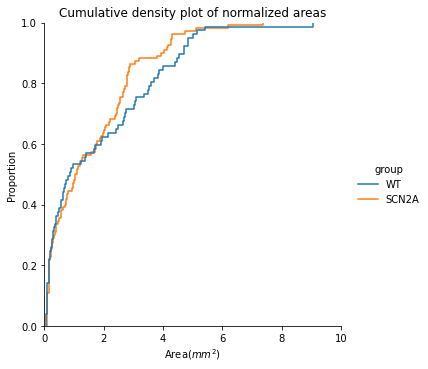

In [40]:
# checking ecdf for area (density: normalize such that the total area of the histogram equals 1)

g = sns.displot(x = 'area_norm', data=df, hue = 'group', 
             kind="ecdf", ax = ax)

g.ax.set_ylim([0, 1])
g.ax.set_xlim([0, 10])
g.ax.set_xlabel("Area($mm^{2}$)")
g.ax.set_title("Cumulative density plot of normalized areas");

# saving figure
g.savefig(fname = "./figures/combined_210127_P6_scn2a_triplet_run456_210126_P5_scn2a_minus_run345_normalized_ROI_areaSize.pdf", 
          dpi = 600, format = "pdf")